---
title: "14b. Decision Trees in sklearn"
---

## Decision Trees

**Decision Trees (DTs)** are a non-parametric supervised learning method used
for :ref:`classification <tree_classification>` and :ref:`regression
<tree_regression>`. The goal is to create a model that predicts the value of a
target variable by learning simple decision rules inferred from the data
features. A tree can be seen as a piecewise constant approximation.

For instance, in the example below, decision trees learn from data to
approximate a sine curve with a set of if-then-else decision rules. The deeper
the tree, the more complex the decision rules and the fitter the model.

.. figure:: ../auto_examples/tree/images/sphx_glr_plot_tree_regression_001.png
   :target: ../auto_examples/tree/plot_tree_regression.html
   :scale: 75
   :align: center

Some advantages of decision trees are:

- Simple to understand and to interpret. Trees can be visualized.

- Requires little data preparation. Other techniques often require data
  normalization, dummy variables need to be created and blank values to
  be removed. Some tree and algorithm combinations support
  :ref:`missing values <tree_missing_value_support>`.

- The cost of using the tree (i.e., predicting data) is logarithmic in the
  number of data points used to train the tree.

- Able to handle both numerical and categorical data. However, the scikit-learn
  implementation does not support categorical variables for now. Other
  techniques are usually specialized in analyzing datasets that have only one type
  of variable. See :ref:`algorithms <tree_algorithms>` for more
  information.

- Able to handle multi-output problems.

- Uses a white box model. If a given situation is observable in a model,
  the explanation for the condition is easily explained by boolean logic.
  By contrast, in a black box model (e.g., in an artificial neural
  network), results may be more difficult to interpret.

- Possible to validate a model using statistical tests. That makes it
  possible to account for the reliability of the model.

- Performs well even if its assumptions are somewhat violated by
  the true model from which the data were generated.


The disadvantages of decision trees include:

- Decision-tree learners can create over-complex trees that do not
  generalize the data well. This is called overfitting. Mechanisms
  such as pruning, setting the minimum number of samples required
  at a leaf node or setting the maximum depth of the tree are
  necessary to avoid this problem.

- Decision trees can be unstable because small variations in the
  data might result in a completely different tree being generated.
  This problem is mitigated by using decision trees within an
  ensemble.

- Predictions of decision trees are neither smooth nor continuous, but
  piecewise constant approximations as seen in the above figure. Therefore,
  they are not good at extrapolation.

- The problem of learning an optimal decision tree is known to be
  NP-complete under several aspects of optimality and even for simple
  concepts. Consequently, practical decision-tree learning algorithms
  are based on heuristic algorithms such as the greedy algorithm where
  locally optimal decisions are made at each node. Such algorithms
  cannot guarantee to return the globally optimal decision tree.  This
  can be mitigated by training multiple trees in an ensemble learner,
  where the features and samples are randomly sampled with replacement.

- There are concepts that are hard to learn because decision trees
  do not express them easily, such as XOR, parity or multiplexer problems.

- Decision tree learners create biased trees if some classes dominate.
  It is therefore recommended to balance the dataset prior to fitting
  with the decision tree.


## Classification

`DecisionTreeClassifier` is a class capable of performing multi-class
classification on a dataset.

As with other classifiers, :class:`DecisionTreeClassifier` takes as input two arrays:
an array X, sparse or dense, of shape ``(n_samples, n_features)`` holding the
training samples, and an array Y of integer values, shape ``(n_samples,)``,
holding the class labels for the training samples::

In [1]:
from sklearn import tree
X = [[0, 0], [1, 1]]
Y = [0, 1]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

After being fitted, the model can then be used to predict the class of samples::

In [2]:
clf.predict([[2., 2.]])

array([1])

In case that there are multiple classes with the same and highest
probability, the classifier will predict the class with the lowest index
amongst those classes.

As an alternative to outputting a specific class, the probability of each class
can be predicted, which is the fraction of training samples of the class in a
leaf::

In [3]:
clf.predict_proba([[2., 2.]])

array([[0., 1.]])

`DecisionTreeClassifier` is capable of both binary (where the
labels are [-1, 1]) classification and multiclass (where the labels are
[0, ..., K-1]) classification.

Using the Iris dataset, we can construct a tree as follows::

In [4]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
X, y = iris.data, iris.target
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

Once trained, you can plot the tree with the :func:`plot_tree` function::

[Text(0.5, 0.9166666666666666, 'x[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.46153846153846156, 0.8333333333333333, 'True  '),
 Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.5384615384615384, 0.8333333333333333, '  False'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 

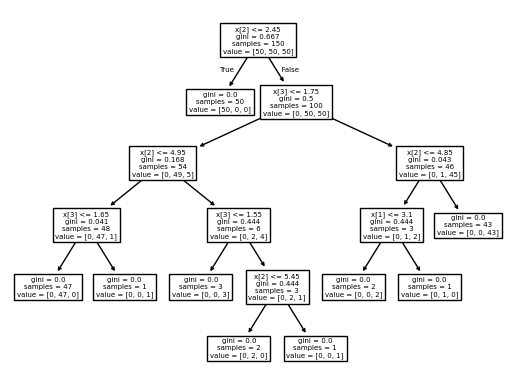

In [5]:
tree.plot_tree(clf)

.. figure:: ../auto_examples/tree/images/sphx_glr_plot_iris_dtc_002.png
   :target: ../auto_examples/tree/plot_iris_dtc.html
   :scale: 75
   :align: center

.. dropdown:: Alternative ways to export trees

  We can also export the tree in `Graphviz
  <https://www.graphviz.org/>`_ format using the :func:`export_graphviz`
  exporter. If you use the `conda <https://conda.io>`_ package manager, the graphviz binaries
  and the python package can be installed with `conda install python-graphviz`.

  Alternatively binaries for graphviz can be downloaded from the graphviz project homepage,
  and the Python wrapper installed from pypi with `pip install graphviz`.

  Below is an example graphviz export of the above tree trained on the entire
  iris dataset; the results are saved in an output file `iris.pdf`::

In [6]:
import graphviz # doctest: +SKIP
dot_data = tree.export_graphviz(clf, out_file=None) # doctest: +SKIP
graph = graphviz.Source(dot_data) # doctest: +SKIP
graph.render("iris") # doctest: +SKIP

'iris.pdf'

  The :func:`export_graphviz` exporter also supports a variety of aesthetic
  options, including coloring nodes by their class (or value for regression) and
  using explicit variable and class names if desired. Jupyter notebooks also
  render these plots inline automatically::

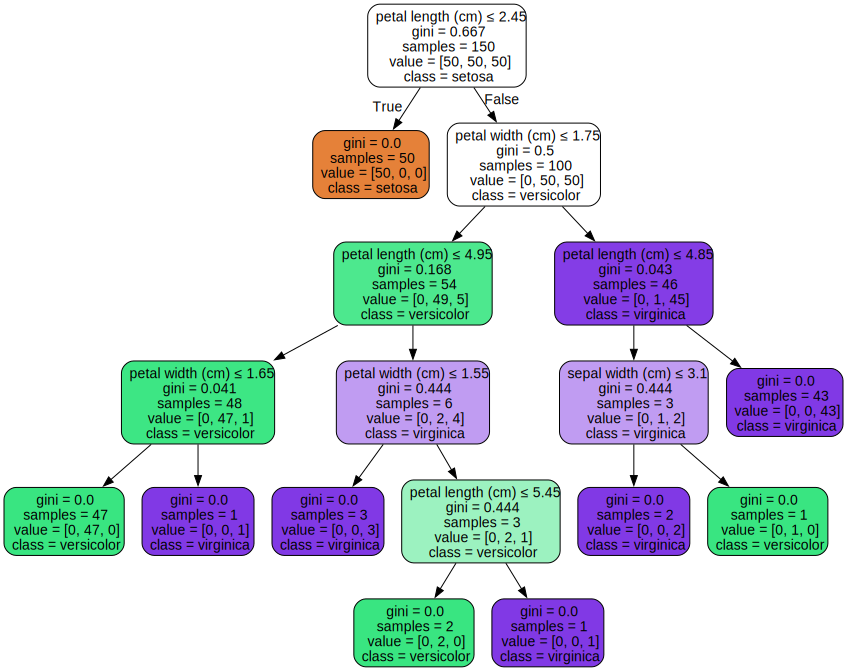

In [7]:
dot_data = tree.export_graphviz(clf, out_file=None, # doctest: +SKIP
                     feature_names=iris.feature_names,  # doctest: +SKIP
                     class_names=iris.target_names,  # doctest: +SKIP
                     filled=True, rounded=True,  # doctest: +SKIP
                     special_characters=True)  # doctest: +SKIP
graph = graphviz.Source(dot_data)  # doctest: +SKIP
graph # doctest: +SKIP

  .. only:: html

      .. figure:: ../images/iris.svg
        :align: center

  .. only:: latex

      .. figure:: ../images/iris.pdf
        :align: center

  .. figure:: ../auto_examples/tree/images/sphx_glr_plot_iris_dtc_001.png
    :target: ../auto_examples/tree/plot_iris_dtc.html
    :align: center
    :scale: 75

  Alternatively, the tree can also be exported in textual format with the
  function :func:`export_text`. This method doesn't require the installation
  of external libraries and is more compact:

In [8]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
iris = load_iris()
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=2)
decision_tree = decision_tree.fit(iris.data, iris.target)
r = export_text(decision_tree, feature_names=iris['feature_names'])
print(r)

|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal width (cm) <= 1.75
|   |   |--- class: 1
|   |--- petal width (cm) >  1.75
|   |   |--- class: 2



      |--- petal width (cm) <= 0.80
      |   |--- class: 0
      |--- petal width (cm) >  0.80
      |   |--- petal width (cm) <= 1.75
      |   |   |--- class: 1
      |   |--- petal width (cm) >  1.75
      |   |   |--- class: 2
      <BLANKLINE>

.. rubric:: Examples

* :ref:`sphx_glr_auto_examples_tree_plot_iris_dtc.py`
* :ref:`sphx_glr_auto_examples_tree_plot_unveil_tree_structure.py`

.. _tree_regression:

## Regression

.. figure:: ../auto_examples/tree/images/sphx_glr_plot_tree_regression_001.png
   :target: ../auto_examples/tree/plot_tree_regression.html
   :scale: 75
   :align: center

Decision trees can also be applied to regression problems, using the
:class:`DecisionTreeRegressor` class.

As in the classification setting, the fit method will take as argument arrays X
and y, only that in this case y is expected to have floating point values
instead of integer values::

In [9]:
from sklearn import tree
X = [[0, 0], [2, 2]]
y = [0.5, 2.5]
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X, y)
clf.predict([[1, 1]])

array([0.5])

    array([0.5])

.. rubric:: Examples

* :ref:`sphx_glr_auto_examples_tree_plot_tree_regression.py`


.. _tree_multioutput:

## Multi-output problems

A multi-output problem is a supervised learning problem with several outputs
to predict, that is when Y is a 2d array of shape ``(n_samples, n_outputs)``.

When there is no correlation between the outputs, a very simple way to solve
this kind of problem is to build n independent models, i.e. one for each
output, and then to use those models to independently predict each one of the n
outputs. However, because it is likely that the output values related to the
same input are themselves correlated, an often better way is to build a single
model capable of predicting simultaneously all n outputs. First, it requires
lower training time since only a single estimator is built. Second, the
generalization accuracy of the resulting estimator may often be increased.

With regard to decision trees, this strategy can readily be used to support
multi-output problems. This requires the following changes:

- Store n output values in leaves, instead of 1;
- Use splitting criteria that compute the average reduction across all
  n outputs.

This module offers support for multi-output problems by implementing this
strategy in both :class:`DecisionTreeClassifier` and
:class:`DecisionTreeRegressor`. If a decision tree is fit on an output array Y
of shape ``(n_samples, n_outputs)`` then the resulting estimator will:

* Output n_output values upon ``predict``;

* Output a list of n_output arrays of class probabilities upon
  ``predict_proba``.

The use of multi-output trees for regression is demonstrated in
:ref:`sphx_glr_auto_examples_tree_plot_tree_regression_multioutput.py`. In this example, the input
X is a single real value and the outputs Y are the sine and cosine of X.

.. figure:: ../auto_examples/tree/images/sphx_glr_plot_tree_regression_multioutput_001.png
   :target: ../auto_examples/tree/plot_tree_regression_multioutput.html
   :scale: 75
   :align: center

The use of multi-output trees for classification is demonstrated in
:ref:`sphx_glr_auto_examples_miscellaneous_plot_multioutput_face_completion.py`. In this example, the inputs
X are the pixels of the upper half of faces and the outputs Y are the pixels of
the lower half of those faces.

.. figure:: ../auto_examples/miscellaneous/images/sphx_glr_plot_multioutput_face_completion_001.png
   :target: ../auto_examples/miscellaneous/plot_multioutput_face_completion.html
   :scale: 75
   :align: center

.. rubric:: Examples

* :ref:`sphx_glr_auto_examples_tree_plot_tree_regression_multioutput.py`
* :ref:`sphx_glr_auto_examples_miscellaneous_plot_multioutput_face_completion.py`

.. rubric:: References

* M. Dumont et al,  `Fast multi-class image annotation with random subwindows
  and multiple output randomized trees
  <http://www.montefiore.ulg.ac.be/services/stochastic/pubs/2009/DMWG09/dumont-visapp09-shortpaper.pdf>`_,
  International Conference on Computer Vision Theory and Applications 2009

.. _tree_complexity:

## Complexity

In general, the run time cost to construct a balanced binary tree is
:math:`O(n_{samples}n_{features}\log(n_{samples}))` and query time
:math:`O(\log(n_{samples}))`.  Although the tree construction algorithm attempts
to generate balanced trees, they will not always be balanced.  Assuming that the
subtrees remain approximately balanced, the cost at each node consists of
searching through :math:`O(n_{features})` to find the feature that offers the
largest reduction in the impurity criterion, e.g. log loss (which is equivalent to an
information gain). This has a cost of
:math:`O(n_{features}n_{samples}\log(n_{samples}))` at each node, leading to a
total cost over the entire trees (by summing the cost at each node) of
:math:`O(n_{features}n_{samples}^{2}\log(n_{samples}))`.


## Tips on practical use

* Decision trees tend to overfit on data with a large number of features.
  Getting the right ratio of samples to number of features is important, since
  a tree with few samples in high dimensional space is very likely to overfit.

* Consider performing  dimensionality reduction (:ref:`PCA <PCA>`,
  :ref:`ICA <ICA>`, or :ref:`feature_selection`) beforehand to
  give your tree a better chance of finding features that are discriminative.

* :ref:`sphx_glr_auto_examples_tree_plot_unveil_tree_structure.py` will help
  in gaining more insights about how the decision tree makes predictions, which is
  important for understanding the important features in the data.

* Visualize your tree as you are training by using the ``export``
  function.  Use ``max_depth=3`` as an initial tree depth to get a feel for
  how the tree is fitting to your data, and then increase the depth.

* Remember that the number of samples required to populate the tree doubles
  for each additional level the tree grows to.  Use ``max_depth`` to control
  the size of the tree to prevent overfitting.

* Use ``min_samples_split`` or ``min_samples_leaf`` to ensure that multiple
  samples inform every decision in the tree, by controlling which splits will
  be considered. A very small number will usually mean the tree will overfit,
  whereas a large number will prevent the tree from learning the data. Try
  ``min_samples_leaf=5`` as an initial value. If the sample size varies
  greatly, a float number can be used as percentage in these two parameters.
  While ``min_samples_split`` can create arbitrarily small leaves,
  ``min_samples_leaf`` guarantees that each leaf has a minimum size, avoiding
  low-variance, over-fit leaf nodes in regression problems.  For
  classification with few classes, ``min_samples_leaf=1`` is often the best
  choice.

  Note that ``min_samples_split`` considers samples directly and independent of
  ``sample_weight``, if provided (e.g. a node with m weighted samples is still
  treated as having exactly m samples). Consider ``min_weight_fraction_leaf`` or
  ``min_impurity_decrease`` if accounting for sample weights is required at splits.

* Balance your dataset before training to prevent the tree from being biased
  toward the classes that are dominant. Class balancing can be done by
  sampling an equal number of samples from each class, or preferably by
  normalizing the sum of the sample weights (``sample_weight``) for each
  class to the same value. Also note that weight-based pre-pruning criteria,
  such as ``min_weight_fraction_leaf``, will then be less biased toward
  dominant classes than criteria that are not aware of the sample weights,
  like ``min_samples_leaf``.

* If the samples are weighted, it will be easier to optimize the tree
  structure using weight-based pre-pruning criterion such as
  ``min_weight_fraction_leaf``, which ensure that leaf nodes contain at least
  a fraction of the overall sum of the sample weights.

* All decision trees use ``np.float32`` arrays internally.
  If training data is not in this format, a copy of the dataset will be made.

* If the input matrix X is very sparse, it is recommended to convert to sparse
  ``csc_matrix`` before calling fit and sparse ``csr_matrix`` before calling
  predict. Training time can be orders of magnitude faster for a sparse
  matrix input compared to a dense matrix when features have zero values in
  most of the samples.


.. _tree_algorithms:

## Tree algorithms: ID3, C4.5, C5.0 and CART

What are all the various decision tree algorithms and how do they differ
from each other? Which one is implemented in scikit-learn?

.. dropdown:: Various decision tree algorithms

  ID3_ (Iterative Dichotomiser 3) was developed in 1986 by Ross Quinlan.
  The algorithm creates a multiway tree, finding for each node (i.e. in
  a greedy manner) the categorical feature that will yield the largest
  information gain for categorical targets. Trees are grown to their
  maximum size and then a pruning step is usually applied to improve the
  ability of the tree to generalize to unseen data.

  C4.5 is the successor to ID3 and removed the restriction that features
  must be categorical by dynamically defining a discrete attribute (based
  on numerical variables) that partitions the continuous attribute value
  into a discrete set of intervals. C4.5 converts the trained trees
  (i.e. the output of the ID3 algorithm) into sets of if-then rules.
  The accuracy of each rule is then evaluated to determine the order
  in which they should be applied. Pruning is done by removing a rule's
  precondition if the accuracy of the rule improves without it.

  C5.0 is Quinlan's latest version release under a proprietary license.
  It uses less memory and builds smaller rulesets than C4.5 while being
  more accurate.

  CART (Classification and Regression Trees) is very similar to C4.5, but
  it differs in that it supports numerical target variables (regression) and
  does not compute rule sets. CART constructs binary trees using the feature
  and threshold that yield the largest information gain at each node.

scikit-learn uses an optimized version of the CART algorithm; however, the
scikit-learn implementation does not support categorical variables for now.

.. _ID3: https://en.wikipedia.org/wiki/ID3_algorithm


.. _tree_mathematical_formulation:

## Mathematical formulation

Given training vectors :math:`x_i \in R^n`, i=1,..., l and a label vector
:math:`y \in R^l`, a decision tree recursively partitions the feature space
such that the samples with the same labels or similar target values are grouped
together.

Let the data at node :math:`m` be represented by :math:`Q_m` with :math:`n_m`
samples. For each candidate split :math:`\theta = (j, t_m)` consisting of a
feature :math:`j` and threshold :math:`t_m`, partition the data into
:math:`Q_m^{left}(\theta)` and :math:`Q_m^{right}(\theta)` subsets

$$
\begin{aligned}
Q_m^{left}(\theta) &= \{(x, y) | x_j \leq t_m\} \\
Q_m^{right}(\theta) &= Q_m \setminus Q_m^{left}(\theta)
\end{aligned}
$$

The quality of a candidate split of node :math:`m` is then computed using an
impurity function or loss function :math:`H()`, the choice of which depends on
the task being solved (classification or regression)

$$
G(Q_m, \theta) = \frac{n_m^{left}}{n_m} H(Q_m^{left}(\theta))
+ \frac{n_m^{right}}{n_m} H(Q_m^{right}(\theta))
$$

Select the parameters that minimises the impurity

$$
\theta^* = \operatorname{argmin}_\theta  G(Q_m, \theta)
$$

Recurse for subsets :math:`Q_m^{left}(\theta^*)` and
:math:`Q_m^{right}(\theta^*)` until the maximum allowable depth is reached,
:math:`n_m < \min_{samples}` or :math:`n_m = 1`.

## Classification criteria

If a target is a classification outcome taking on values 0,1,...,K-1,
for node :math:`m`, let

$$
p_{mk} = \frac{1}{n_m} \sum_{y \in Q_m} I(y = k)
$$

be the proportion of class k observations in node :math:`m`. If :math:`m` is a
terminal node, `predict_proba` for this region is set to :math:`p_{mk}`.
Common measures of impurity are the following.

Gini:

$$
H(Q_m) = \sum_k p_{mk} (1 - p_{mk})
$$

Log Loss or Entropy:

$$
H(Q_m) = - \sum_k p_{mk} \log(p_{mk})
$$

.. dropdown:: Shannon entropy

  The entropy criterion computes the Shannon entropy of the possible classes. It
  takes the class frequencies of the training data points that reached a given
  leaf :math:`m` as their probability. Using the **Shannon entropy as tree node
  splitting criterion is equivalent to minimizing the log loss** (also known as
  cross-entropy and multinomial deviance) between the true labels :math:`y_i`
  and the probabilistic predictions :math:`T_k(x_i)` of the tree model :math:`T` for class :math:`k`.

  To see this, first recall that the log loss of a tree model :math:`T`
  computed on a dataset :math:`D` is defined as follows:

$$
\mathrm{LL}(D, T) = -\frac{1}{n} \sum_{(x_i, y_i) \in D} \sum_k I(y_i = k) \log(T_k(x_i))
$$

  where :math:`D` is a training dataset of :math:`n` pairs :math:`(x_i, y_i)`.

  In a classification tree, the predicted class probabilities within leaf nodes
  are constant, that is: for all :math:`(x_i, y_i) \in Q_m`, one has:
  :math:`T_k(x_i) = p_{mk}` for each class :math:`k`.

  This property makes it possible to rewrite :math:`\mathrm{LL}(D, T)` as the
  sum of the Shannon entropies computed for each leaf of :math:`T` weighted by
  the number of training data points that reached each leaf:

$$
\mathrm{LL}(D, T) = \sum_{m \in T} \frac{n_m}{n} H(Q_m)
$$

## Regression criteria

If the target is a continuous value, then for node :math:`m`, common
criteria to minimize as for determining locations for future splits are Mean
Squared Error (MSE or L2 error), Poisson deviance as well as Mean Absolute
Error (MAE or L1 error). MSE and Poisson deviance both set the predicted value
of terminal nodes to the learned mean value :math:`\bar{y}_m` of the node
whereas the MAE sets the predicted value of terminal nodes to the median
:math:`median(y)_m`.

Mean Squared Error:

$$
\bar{y}_m = \frac{1}{n_m} \sum_{y \in Q_m} y
$$

$$
H(Q_m) = \frac{1}{n_m} \sum_{y \in Q_m} (y - \bar{y}_m)^2
$$

Mean Poisson deviance:

$$
H(Q_m) = \frac{2}{n_m} \sum_{y \in Q_m} (y \log\frac{y}{\bar{y}_m} - y + \bar{y}_m)
$$

Setting `criterion="poisson"` might be a good choice if your target is a count
or a frequency (count per some unit). In any case, :math:`y >= 0` is a
necessary condition to use this criterion. Note that it fits much slower than
the MSE criterion. For performance reasons the actual implementation minimizes
the half mean poisson deviance, i.e. the mean poisson deviance divided by 2.

Mean Absolute Error:

$$
median(y)_m = \underset{y \in Q_m}{\mathrm{median}}(y)
$$

$$
H(Q_m) = \frac{1}{n_m} \sum_{y \in Q_m} |y - median(y)_m|
$$

Note that it fits much slower than the MSE criterion.

.. _tree_missing_value_support:

## Missing Values Support

:class:`DecisionTreeClassifier` and :class:`DecisionTreeRegressor`
have built-in support for missing values when `splitter='best'` and criterion is
`'gini'`, `'entropy`', or `'log_loss'`, for classification or
`'squared_error'`, `'friedman_mse'`, or `'poisson'` for regression.

For each potential threshold on the non-missing data, the splitter will evaluate
the split with all the missing values going to the left node or the right node.

Decisions are made as follows:

- By default when predicting, the samples with missing values are classified
  with the class used in the split found during training::

In [10]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np

X = np.array([0, 1, 6, np.nan]).reshape(-1, 1)
y = [0, 0, 1, 1]

tree = DecisionTreeClassifier(random_state=0).fit(X, y)
tree.predict(X)

array([0, 0, 1, 1])

    array([0, 0, 1, 1])

- If the criterion evaluation is the same for both nodes,
  then the tie for missing value at predict time is broken by going to the
  right node. The splitter also checks the split where all the missing
  values go to one child and non-missing values go to the other::

In [11]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np

X = np.array([np.nan, -1, np.nan, 1]).reshape(-1, 1)
y = [0, 0, 1, 1]

tree = DecisionTreeClassifier(random_state=0).fit(X, y)

X_test = np.array([np.nan]).reshape(-1, 1)
tree.predict(X_test)

array([1])

    array([1])

- If no missing values are seen during training for a given feature, then during
  prediction missing values are mapped to the child with the most samples::

In [12]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np

X = np.array([0, 1, 2, 3]).reshape(-1, 1)
y = [0, 1, 1, 1]

tree = DecisionTreeClassifier(random_state=0).fit(X, y)

X_test = np.array([np.nan]).reshape(-1, 1)
tree.predict(X_test)

array([1])

    array([1])

.. _minimal_cost_complexity_pruning:

## Minimal Cost-Complexity Pruning

Minimal cost-complexity pruning is an algorithm used to prune a tree to avoid
over-fitting, described in Chapter 3 of [BRE]_. This algorithm is parameterized
by :math:`\alpha\ge0` known as the complexity parameter. The complexity
parameter is used to define the cost-complexity measure, :math:`R_\alpha(T)` of
a given tree :math:`T`:

$$
R_\alpha(T) = R(T) + \alpha|\widetilde{T}|
$$

where :math:`|\widetilde{T}|` is the number of terminal nodes in :math:`T` and :math:`R(T)`
is traditionally defined as the total misclassification rate of the terminal
nodes. Alternatively, scikit-learn uses the total sample weighted impurity of
the terminal nodes for :math:`R(T)`. As shown above, the impurity of a node
depends on the criterion. Minimal cost-complexity pruning finds the subtree of
:math:`T` that minimizes :math:`R_\alpha(T)`.

The cost complexity measure of a single node is
:math:`R_\alpha(t)=R(t)+\alpha`. The branch, :math:`T_t`, is defined to be a
tree where node :math:`t` is its root. In general, the impurity of a node
is greater than the sum of impurities of its terminal nodes,
:math:`R(T_t)<R(t)`. However, the cost complexity measure of a node,
:math:`t`, and its branch, :math:`T_t`, can be equal depending on
:math:`\alpha`. We define the effective :math:`\alpha` of a node to be the
value where they are equal, :math:`R_\alpha(T_t)=R_\alpha(t)` or
:math:`\alpha_{eff}(t)=\frac{R(t)-R(T_t)}{|T|-1}`. A non-terminal node
with the smallest value of :math:`\alpha_{eff}` is the weakest link and will
be pruned. This process stops when the pruned tree's minimal
:math:`\alpha_{eff}` is greater than the ``ccp_alpha`` parameter.

.. rubric:: Examples

* :ref:`sphx_glr_auto_examples_tree_plot_cost_complexity_pruning.py`

.. rubric:: References

.. [BRE] L. Breiman, J. Friedman, R. Olshen, and C. Stone. Classification
  and Regression Trees. Wadsworth, Belmont, CA, 1984.

* https://en.wikipedia.org/wiki/Decision_tree_learning

* https://en.wikipedia.org/wiki/Predictive_analytics

* J.R. Quinlan. C4. 5: programs for machine learning. Morgan
  Kaufmann, 1993.

* T. Hastie, R. Tibshirani and J. Friedman. Elements of Statistical
  Learning, Springer, 2009.